<h4> Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<h4> Loading Dataset

In [3]:
wine_dataset = pd.read_csv('WineQT.csv')

In [13]:
wine_dataset = wine_dataset.drop(columns=['Id'])

In [15]:
wine_dataset.shape

(1143, 12)

In [17]:
wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9       0.08   
1            7.8              0.88         0.00             2.6       0.10   
2            7.8              0.76         0.04             2.3       0.09   
3           11.2              0.28         0.56             1.9       0.08   
4            7.4              0.70         0.00             1.9       0.08   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   
2                 15.0                  54.0      1.0  3.26       0.65   
3                 17.0                  60.0      1.0  3.16       0.58   
4                 11.0                  34.0      1.0  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [19]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   float64
dtypes: float64(12)
memory usage: 107.3 KB


<h4> Data Analysis and Visualization

In [24]:
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531934     0.268364        2.532152   
std         1.747595          0.180206     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.395000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.087349            15.615486             45.914698     0.998431   
std       0.047349            10.250486             32.782130     0.003567   
min       0.010000             1.000000              6.000000     0.990000   
25%       0.070000             7.000000             21.000000     1.000000   
50%       0.080000            13.000000             37.000000     1.000000   
75%       0.090000            21.000000             61.000000     1.000000   
max       0.610000            68.000000            289.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442108     5.657043  
std       0.156664     0.170399     1.082211     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

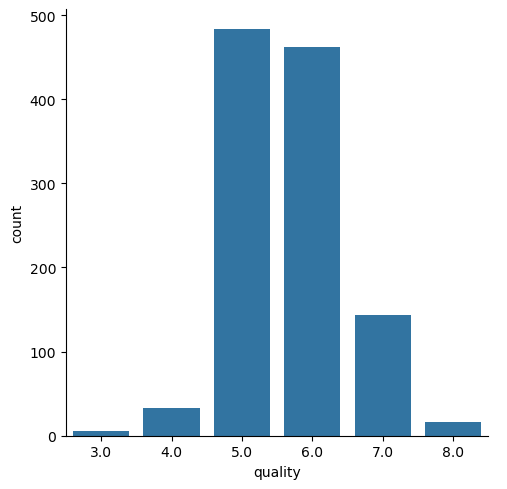

In [26]:
sns.catplot(x='quality', data=wine_dataset, kind='count')
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

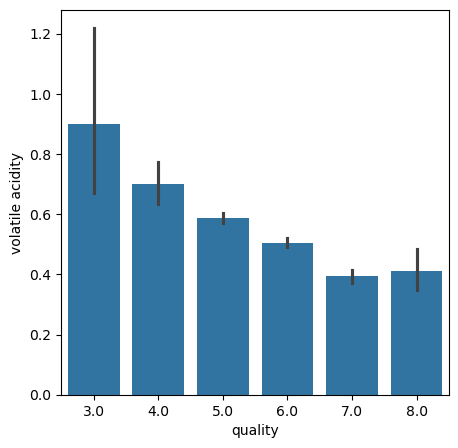

In [28]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

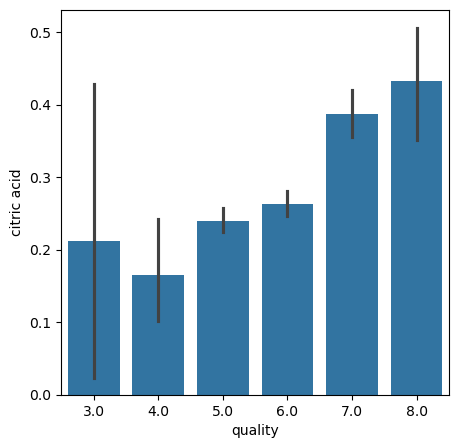

In [30]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<h4> Correlation

In [33]:
correlation = wine_dataset.corr()

<Axes: >

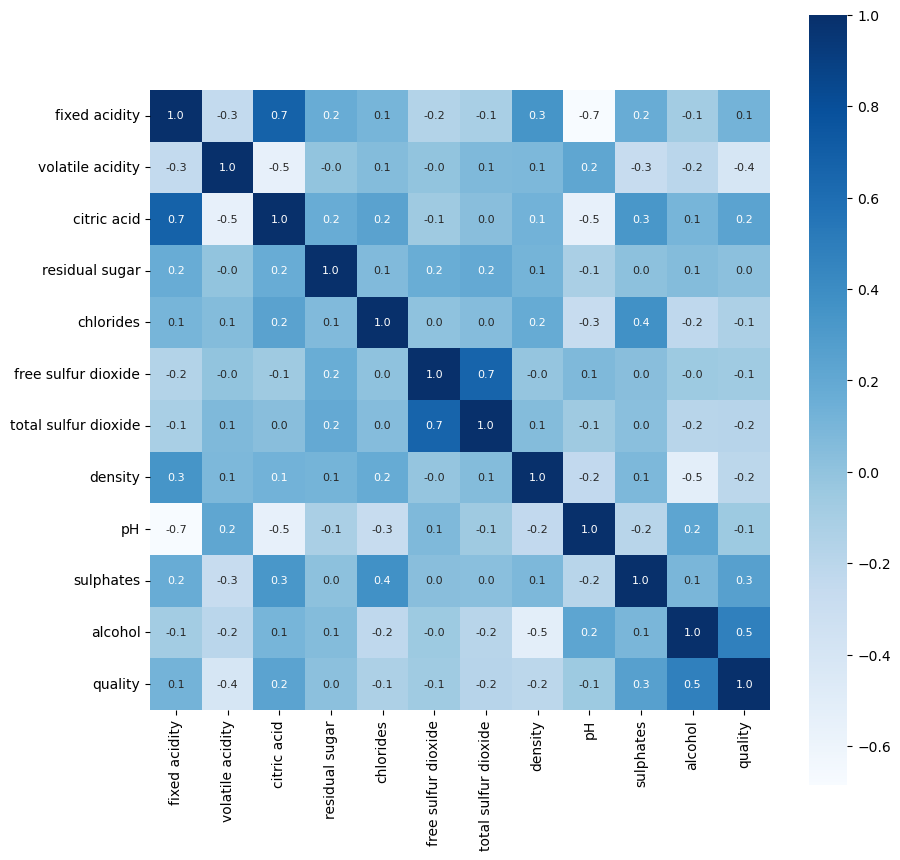

In [35]:
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<h4> Data Preprocessing

In [38]:
X = wine_dataset.drop('quality',axis=1)

In [40]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9       0.08   
1               7.8              0.88         0.00             2.6       0.10   
2               7.8              0.76         0.04             2.3       0.09   
3              11.2              0.28         0.56             1.9       0.08   
4               7.4              0.70         0.00             1.9       0.08   
...             ...               ...          ...             ...        ...   
1138            6.3              0.51         0.13             2.3       0.08   
1139            6.8              0.62         0.08             1.9       0.07   
1140            6.2              0.60         0.08             2.0       0.09   
1141            5.9              0.55         0.10             2.2       0.06   
1142            5.9              0.65         0.12             2.0       0.08   

      free sulfur dioxide  

<h4> Label Binarization

In [43]:
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [45]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


<h4> Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

In [50]:
print(y.shape, y_train.shape, y_test.shape)

(1143,) (914,) (229,)


<h4> Model Training

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h4> Model Evaluation

In [56]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [58]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.9082969432314411


<h4> Predictive System

In [61]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

In [63]:
input_data_as_numpy_array = np.asarray(input_data)

In [65]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [67]:
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 1):
    print('Good Quality Wine')
else:
    print('Bad quality Wine')

[0]
Bad quality Wine


C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
